In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [3]:
ds_open = xr.open_dataset("../data/open/fields_biogem_3d.nc")
ds_closed = xr.open_dataset("../data/close/fields_biogem_3d.nc") 

# open

In [4]:
xu_open = ds_open["xu"].to_numpy()
yu_open = ds_open["yu"].to_numpy()
u_open = ds_open["phys_u"].isel(zt=0, time=-1).to_numpy()  # surface speed (m/s)
v_open = ds_open["phys_v"].isel(zt=0, time=-1).to_numpy() 
speed_open = np.sqrt(u_open**2 + v_open**2)

In [5]:
#colorbar_levels = np.arange(-.1, 0.1, 0.01)
xu_grid_open, yu_grid_open = np.meshgrid(np.linspace(xu_open.min(), xu_open.max(), len(xu_open)),
                                np.linspace(yu_open.min(), yu_open.max(), len(yu_open)))

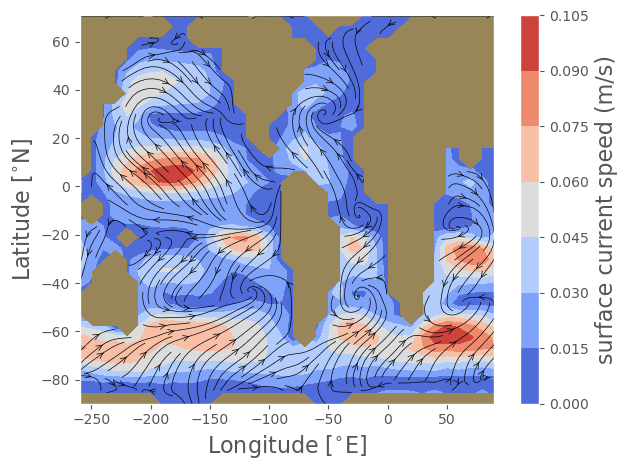

In [6]:
plt.fill_between(xu_open, yu_open.min(), yu_open.max(), color='#988558')
contour_filled_open = plt.contourf(xu_grid_open, yu_grid_open, speed_open, 
                              #levels=colorbar_levels, 
                              cmap="coolwarm")
plt.xlabel(r"Longitude [$^{\circ}$E]", fontsize=16)
plt.ylabel(r"Latitude [$^{\circ}$N]", fontsize=16)

cbar = plt.colorbar(contour_filled_open)
cbar.set_label(r"surface current speed (m/s)", fontsize=16);

density = 2
plt.streamplot(xu_grid_open, yu_grid_open, u_open, v_open,
               density=density, 
               color='black', linewidth=0.5, arrowsize=1, arrowstyle='->')
plt.xlim([xu_open.min(), xu_open.max()])
plt.ylim([yu_open.min(), yu_open.max()])
plt.tight_layout()
#plt.savefig("../figs/fig1a.png", dpi=500)

# closed

In [7]:
xu_closed = ds_closed["xu"].to_numpy()
yu_closed = ds_closed["yu"].to_numpy()
u_closed = ds_closed["phys_u"].isel(zt=0, time=-1).to_numpy()  
v_closed = ds_closed["phys_v"].isel(zt=0, time=-1).to_numpy() 
speed_closed = np.sqrt(u_closed**2 + v_closed**2)

In [8]:
xu_grid_closed, yu_grid_closed = np.meshgrid(np.linspace(xu_closed.min(), xu_closed.max(), len(xu_closed)),
                                np.linspace(yu_closed.min(), yu_closed.max(), len(yu_closed)))

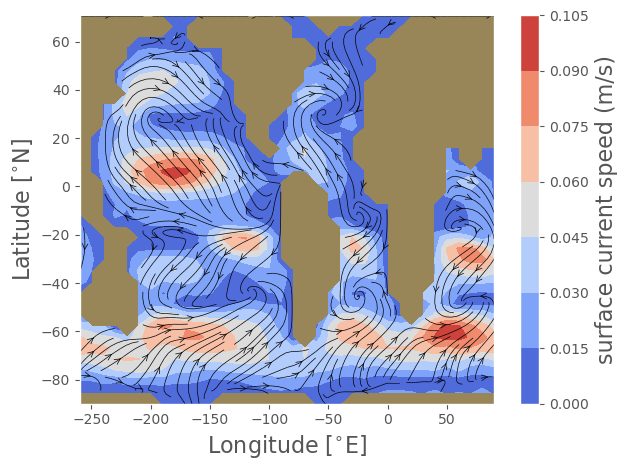

In [9]:
plt.fill_between(xu_closed, yu_closed.min(), yu_closed.max(), color='#988558')
contour_filled = plt.contourf(xu_grid_closed, yu_grid_closed, speed_closed,
                              cmap="coolwarm")
plt.xlabel(r"Longitude [$^{\circ}$E]", fontsize=16)
plt.ylabel(r"Latitude [$^{\circ}$N]", fontsize=16)

cbar = plt.colorbar(contour_filled)
cbar.set_label(r"surface current speed (m/s)", fontsize=16);

density = 2
plt.streamplot(xu_grid_closed, yu_grid_closed, u_closed, v_closed,
               density=density, color='black', linewidth=0.5, 
               arrowsize=1, arrowstyle='->')

plt.xlim([xu_closed.min(), xu_closed.max()])
plt.ylim([yu_closed.min(), yu_closed.max()])
plt.tight_layout()
#plt.savefig("../figs/fig1b.png", dpi=500)

In [18]:
u_cb = ds_closed["phys_u"].isel(zt=0, time=-1)  
v_cb = ds_closed["phys_v"].isel(zt=0, time=-1) 
u_ob = ds_open["phys_u"].isel(zt=0, time=-1)
v_ob = ds_open["phys_v"].isel(zt=0, time=-1)

u_anom = (u_cb - u_ob).to_numpy()
v_anom = (v_cb - v_ob).to_numpy()
speed_anom = np.sqrt(u_anom**2 + v_anom**2)

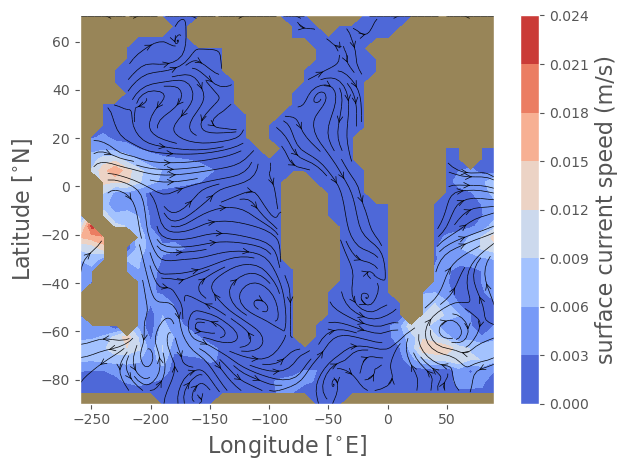

In [19]:
plt.fill_between(xu_closed, yu_closed.min(), yu_closed.max(), color='#988558')
contour_filled = plt.contourf(xu_grid_closed, yu_grid_closed, speed_anom,
                              cmap="coolwarm")
plt.xlabel(r"Longitude [$^{\circ}$E]", fontsize=16)
plt.ylabel(r"Latitude [$^{\circ}$N]", fontsize=16)

cbar = plt.colorbar(contour_filled)
cbar.set_label(r"surface current speed (m/s)", fontsize=16);

density = 2
plt.streamplot(xu_grid_closed, yu_grid_closed, u_anom, v_anom,
               density=density, color='black', linewidth=0.5, 
               arrowsize=1, arrowstyle='->')

plt.xlim([xu_closed.min(), xu_closed.max()])
plt.ylim([yu_closed.min(), yu_closed.max()])
plt.tight_layout()


In [25]:
ds_open["zt"].to_dataframe().apply(lambda x: round(x, 3))["zt"].to_numpy()

array([  40.42 ,  127.552,  228.77 ,  346.354,  482.949,  641.629,
        825.964, 1040.103, 1288.865, 1577.846, 1913.551, 2303.532,
       2756.567, 3282.848, 3894.22 , 4604.439])